<a href="https://colab.research.google.com/github/rooncal/Data-Science/blob/main/Hotel_Reservation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Imports and settings

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

In [2]:
pd.options.display.max_colwidth = 999
HOTEL_DATA = "drive/MyDrive/Hotel-Data"

#Understanding the dataset

In [3]:

df = pd.read_csv(f'{HOTEL_DATA}/Hotel-A-train.csv')

In [4]:
df.head(3)

,Reservation-id,Gender,Age,Ethnicity,Educational_Level,Income,Country_region,Hotel_Type,Expected_checkin,Expected_checkout,Booking_date,Adults,Children,Babies,Meal_Type,Visted_Previously,Previous_Cancellations,Deposit_type,Booking_channel,Required_Car_Parking,Reservation_Status,Use_Promotion,Discount_Rate,Room_Rate
0,39428300,F,40,Latino,Grad,<25K,North,City Hotel,7/1/2015,7/2/2015,5/21/2015,2,2,0,BB,No,No,No Deposit,Online,Yes,Check-In,Yes,10,218
1,77491756,F,49,Latino,Mid-School,50K -- 100K,East,City Hotel,7/1/2015,7/2/2015,5/26/2015,3,3,0,BB,No,No,Refundable,Online,Yes,Check-In,No,0,185
2,73747291,F,42,caucasian,Grad,<25K,East,City Hotel,7/2/2015,7/6/2015,6/29/2015,3,3,0,BB,No,No,No Deposit,Online,Yes,Check-In,No,0,119


In [5]:
df.describe()

,Reservation-id,Age,Adults,Children,Babies,Discount_Rate,Room_Rate
count,2.749900e+04,27499.000000,27499.000000,27499.000000,27499.000000,27499.000000,27499.000000
mean,5.016461e+07,43.977454,2.333576,1.743882,0.351540,12.495182,175.136478
std,2.886911e+07,15.303148,1.176526,0.721972,0.573326,11.206036,43.877087
min,3.154000e+03,18.000000,1.000000,1.000000,0.000000,0.000000,100.000000
25%,2.523943e+07,31.000000,2.000000,1.000000,0.000000,5.000000,137.000000
50%,5.014996e+07,44.000000,2.000000,2.000000,0.000000,10.000000,175.000000
75%,7.518288e+07,57.000000,3.000000,2.000000,1.000000,20.000000,214.000000
max,9.999900e+07,70.000000,5.000000,3.000000,2.000000,40.000000,250.000000


In [6]:
df.dtypes

Reservation-id             int64
Gender                    object
Age                        int64
Ethnicity                 object
Educational_Level         object
Income                    object
Country_region            object
Hotel_Type                object
Expected_checkin          object
Expected_checkout         object
Booking_date              object
Adults                     int64
Children                   int64
Babies                     int64
Meal_Type                 object
Visted_Previously         object
Previous_Cancellations    object
Deposit_type              object
Booking_channel           object
Required_Car_Parking      object
Reservation_Status        object
Use_Promotion             object
Discount_Rate              int64
Room_Rate                  int64
dtype: object

In [7]:
dictionary_df = pd.read_csv(f'{HOTEL_DATA}/Hotel-A-data-dictionary.csv')

In [8]:
dictionary_df

,Data Field,Description
0,Reservation-id,A unique booking id
1,Gender,Gender of the reservation person
2,Age,Age of the reservation person. Age is varying from 18 -- 70
3,Ethnicity,"Ethnicity of the reservation person. This field takes one of the following ethnicities: Latino, African American, Asian American and Caucasian"
4,Educational_Level,"Educational level of the reservation person. This field takes one of the following educational level; Mid-School, High-School, College and Grad"
5,Income,"Income of the reservation person. This field takes one of the following: <25K, 25K – 50K,50K – 100K and >100K"
6,Country_region,"Country region of the reservation person. This field takes one of the following: North, South, East and West"
7,Hotel_Type,"Hotel type of the reservation; i.e City Hotels, Airport Hotels and Resorts"
8,Expected_checkin,Expected check-in date
9,Expected_checkout,Expected checkout date


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f408dd89490>]],
      dtype=object)

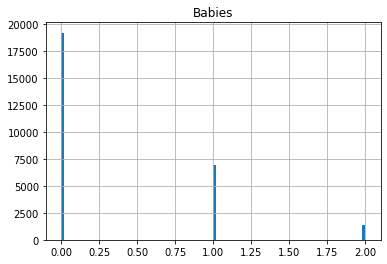

In [9]:

df.hist(column="Babies", bins=100)

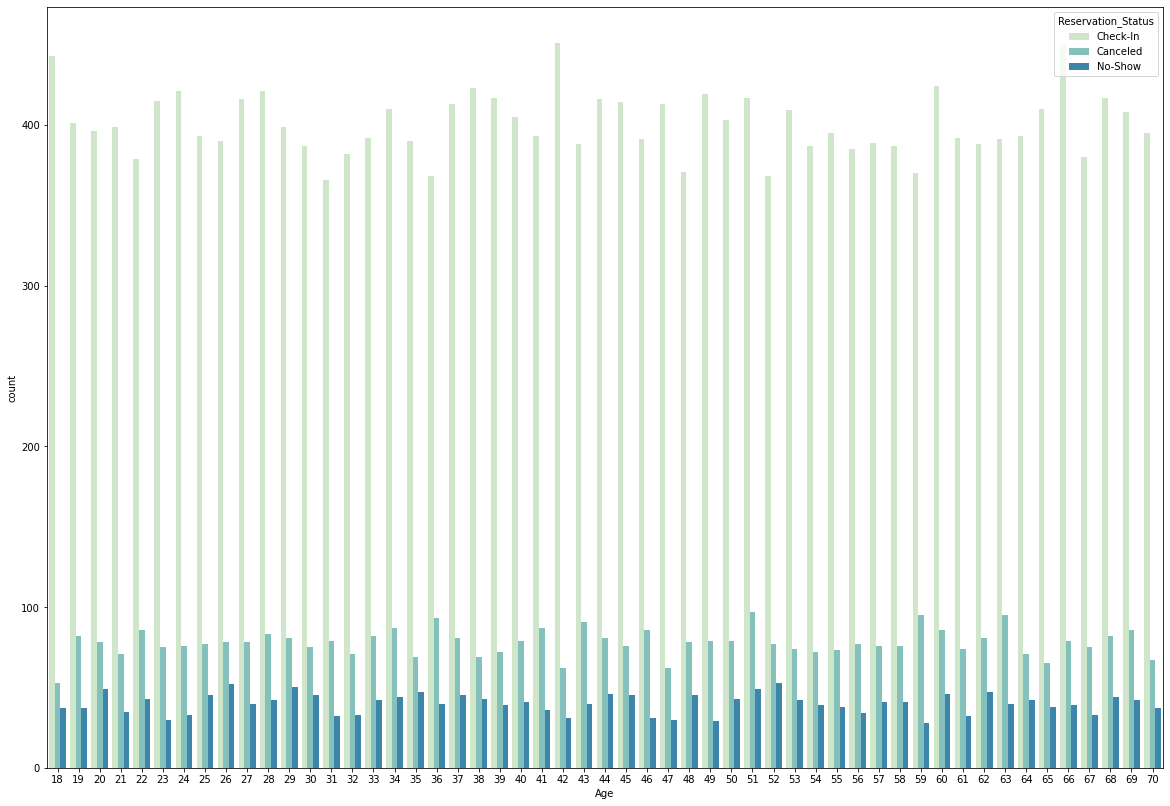

In [10]:
plt.figure(figsize=(20,14))
sns.countplot(x='Age',data = df, hue = 'Reservation_Status',palette='GnBu')
plt.show()

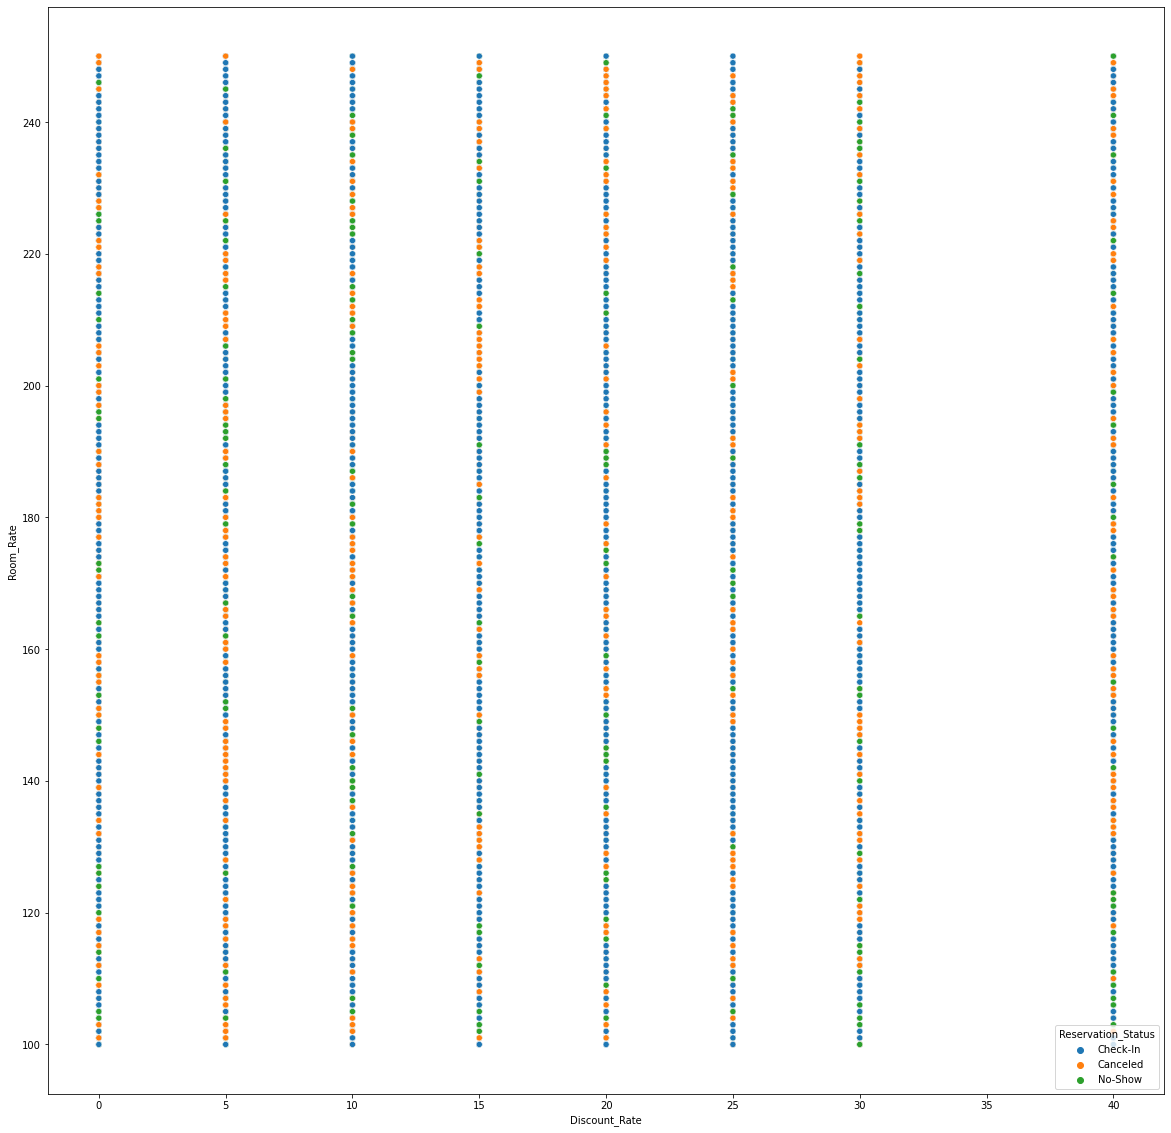

In [11]:
plt.figure(figsize=(20,20))
sns.scatterplot(x='Discount_Rate',y='Room_Rate',data=df, hue='Reservation_Status')
plt.show()

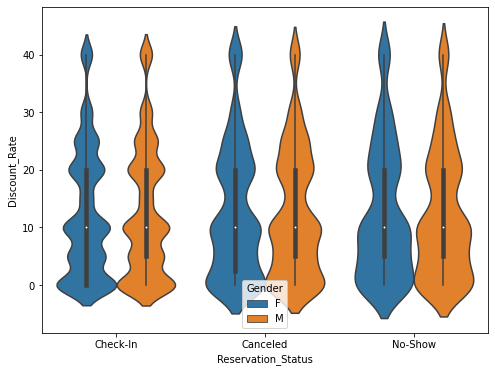

In [12]:
plt.figure(figsize=(8,6))
sns.violinplot(x='Reservation_Status',y='Discount_Rate',data=df, hue='Gender')
plt.show()

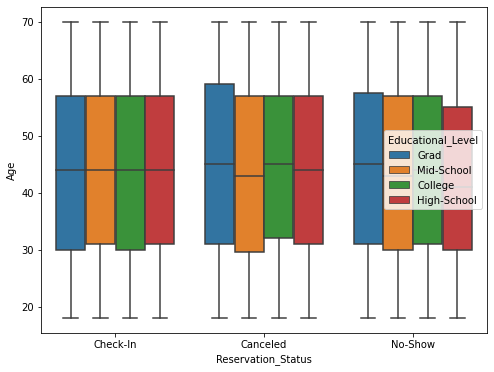

In [13]:
plt.figure(figsize=(8,6))
sns.boxplot(x='Reservation_Status',y='Age',data=df, hue='Educational_Level')
plt.show()

#Data Preprocessing

In [14]:
df.isnull().sum()

Reservation-id            0
Gender                    0
Age                       0
Ethnicity                 0
Educational_Level         0
Income                    0
Country_region            0
Hotel_Type                0
Expected_checkin          0
Expected_checkout         0
Booking_date              0
Adults                    0
Children                  0
Babies                    0
Meal_Type                 0
Visted_Previously         0
Previous_Cancellations    0
Deposit_type              0
Booking_channel           0
Required_Car_Parking      0
Reservation_Status        0
Use_Promotion             0
Discount_Rate             0
Room_Rate                 0
dtype: int64

In [34]:
label_encoder = preprocessing.LabelEncoder()
df.dtypes

Gender                    object
Age                        int64
Ethnicity                 object
Educational_Level         object
Income                    object
Country_region            object
Hotel_Type                object
Expected_checkin          object
Expected_checkout         object
Booking_date              object
Adults                     int64
Children                   int64
Babies                     int64
Meal_Type                 object
Visted_Previously         object
Previous_Cancellations    object
Deposit_type              object
Booking_channel           object
Required_Car_Parking      object
Reservation_Status        object
Use_Promotion             object
Discount_Rate              int64
Room_Rate                  int64
dtype: object

In [15]:
df = df.drop("Reservation-id",axis="columns")

In [45]:
df_2 = pd.get_dummies(df,drop_first=True)
sample = df.apply(label_encoder.fit_transform)

In [17]:
df_2.head()

,Age,Adults,Children,Babies,Discount_Rate,Room_Rate,Gender_M,Ethnicity_Asian American,Ethnicity_Latino,Ethnicity_caucasian,Educational_Level_Grad,Educational_Level_High-School,Educational_Level_Mid-School,Income_50K -- 100K,Income_<25K,Income_>100K,Country_region_North,Country_region_South,Country_region_West,Hotel_Type_City Hotel,Hotel_Type_Resort,Expected_checkin_1/1/2016,Expected_checkin_1/1/2017,Expected_checkin_1/10/2016,Expected_checkin_1/10/2017,Expected_checkin_1/11/2016,Expected_checkin_1/11/2017,Expected_checkin_1/12/2016,Expected_checkin_1/12/2017,Expected_checkin_1/13/2016,Expected_checkin_1/13/2017,Expected_checkin_1/14/2016,Expected_checkin_1/14/2017,Expected_checkin_1/15/2016,Expected_checkin_1/15/2017,Expected_checkin_1/16/2016,Expected_checkin_1/16/2017,Expected_checkin_1/17/2016,Expected_checkin_1/17/2017,Expected_checkin_1/18/2015,...,Booking_date_9/27/2016,Booking_date_9/28/2014,Booking_date_9/28/2015,Booking_date_9/28/2016,Booking_date_9/29/2015,Booking_date_9/29/2016,Booking_date_9/3/2014,Booking_date_9/3/2015,Booking_date_9/3/2016,Booking_date_9/30/2014,Booking_date_9/30/2015,Booking_date_9/30/2016,Booking_date_9/4/2015,Booking_date_9/4/2016,Booking_date_9/5/2015,Booking_date_9/5/2016,Booking_date_9/6/2014,Booking_date_9/6/2015,Booking_date_9/6/2016,Booking_date_9/7/2014,Booking_date_9/7/2015,Booking_date_9/7/2016,Booking_date_9/8/2014,Booking_date_9/8/2015,Booking_date_9/8/2016,Booking_date_9/9/2014,Booking_date_9/9/2015,Booking_date_9/9/2016,Meal_Type_FB,Meal_Type_HB,Visted_Previously_Yes,Previous_Cancellations_Yes,Deposit_type_Non-Refundable,Deposit_type_Refundable,Booking_channel_Direct,Booking_channel_Online,Required_Car_Parking_Yes,Reservation_Status_Check-In,Reservation_Status_No-Show,Use_Promotion_Yes
0,40,2,2,0,10,218,0,0,1,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,1
1,49,3,3,0,0,185,0,0,1,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,1,0,0
2,42,3,3,0,0,119,0,0,0,1,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0
3,25,4,3,0,5,144,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,1
4,62,1,1,0,10,242,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1


In [38]:
x = df[["Age", "Discount_Rate", "Room_Rate"]].values
min_max_scaler = preprocessing.MinMaxScaler()
df_scaled = pd.DataFrame(min_max_scaler.fit_transform(x))

In [19]:
pd.DataFrame(df_scaled).head()

,0,1,2
0,0.423077,0.250,0.786667
1,0.596154,0.000,0.566667
2,0.461538,0.000,0.126667
3,0.134615,0.125,0.293333
4,0.846154,0.250,0.946667


In [20]:
df_2[["Age", "Discount_Rate", "Room_Rate"]] = df_scaled[[0,1,2]] 

In [21]:
df_2.head(3)

,Age,Adults,Children,Babies,Discount_Rate,Room_Rate,Gender_M,Ethnicity_Asian American,Ethnicity_Latino,Ethnicity_caucasian,Educational_Level_Grad,Educational_Level_High-School,Educational_Level_Mid-School,Income_50K -- 100K,Income_<25K,Income_>100K,Country_region_North,Country_region_South,Country_region_West,Hotel_Type_City Hotel,Hotel_Type_Resort,Expected_checkin_1/1/2016,Expected_checkin_1/1/2017,Expected_checkin_1/10/2016,Expected_checkin_1/10/2017,Expected_checkin_1/11/2016,Expected_checkin_1/11/2017,Expected_checkin_1/12/2016,Expected_checkin_1/12/2017,Expected_checkin_1/13/2016,Expected_checkin_1/13/2017,Expected_checkin_1/14/2016,Expected_checkin_1/14/2017,Expected_checkin_1/15/2016,Expected_checkin_1/15/2017,Expected_checkin_1/16/2016,Expected_checkin_1/16/2017,Expected_checkin_1/17/2016,Expected_checkin_1/17/2017,Expected_checkin_1/18/2015,...,Booking_date_9/27/2016,Booking_date_9/28/2014,Booking_date_9/28/2015,Booking_date_9/28/2016,Booking_date_9/29/2015,Booking_date_9/29/2016,Booking_date_9/3/2014,Booking_date_9/3/2015,Booking_date_9/3/2016,Booking_date_9/30/2014,Booking_date_9/30/2015,Booking_date_9/30/2016,Booking_date_9/4/2015,Booking_date_9/4/2016,Booking_date_9/5/2015,Booking_date_9/5/2016,Booking_date_9/6/2014,Booking_date_9/6/2015,Booking_date_9/6/2016,Booking_date_9/7/2014,Booking_date_9/7/2015,Booking_date_9/7/2016,Booking_date_9/8/2014,Booking_date_9/8/2015,Booking_date_9/8/2016,Booking_date_9/9/2014,Booking_date_9/9/2015,Booking_date_9/9/2016,Meal_Type_FB,Meal_Type_HB,Visted_Previously_Yes,Previous_Cancellations_Yes,Deposit_type_Non-Refundable,Deposit_type_Refundable,Booking_channel_Direct,Booking_channel_Online,Required_Car_Parking_Yes,Reservation_Status_Check-In,Reservation_Status_No-Show,Use_Promotion_Yes
0,0.423077,2,2,0,0.25,0.786667,0,0,1,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,1
1,0.596154,3,3,0,0.00,0.566667,0,0,1,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,1,0,0
2,0.461538,3,3,0,0.00,0.126667,0,0,0,1,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0


#Feature Engineering

In [44]:
df.head(3)

,Gender,Age,Ethnicity,Educational_Level,Income,Country_region,Hotel_Type,Expected_checkin,Expected_checkout,Booking_date,Adults,Children,Babies,Meal_Type,Visted_Previously,Previous_Cancellations,Deposit_type,Booking_channel,Required_Car_Parking,Reservation_Status,Use_Promotion,Discount_Rate,Room_Rate
0,F,40,Latino,Grad,<25K,North,City Hotel,7/1/2015,7/2/2015,5/21/2015,2,2,0,BB,No,No,No Deposit,Online,Yes,Check-In,Yes,10,218
1,F,49,Latino,Mid-School,50K -- 100K,East,City Hotel,7/1/2015,7/2/2015,5/26/2015,3,3,0,BB,No,No,Refundable,Online,Yes,Check-In,No,0,185
2,F,42,caucasian,Grad,<25K,East,City Hotel,7/2/2015,7/6/2015,6/29/2015,3,3,0,BB,No,No,No Deposit,Online,Yes,Check-In,No,0,119


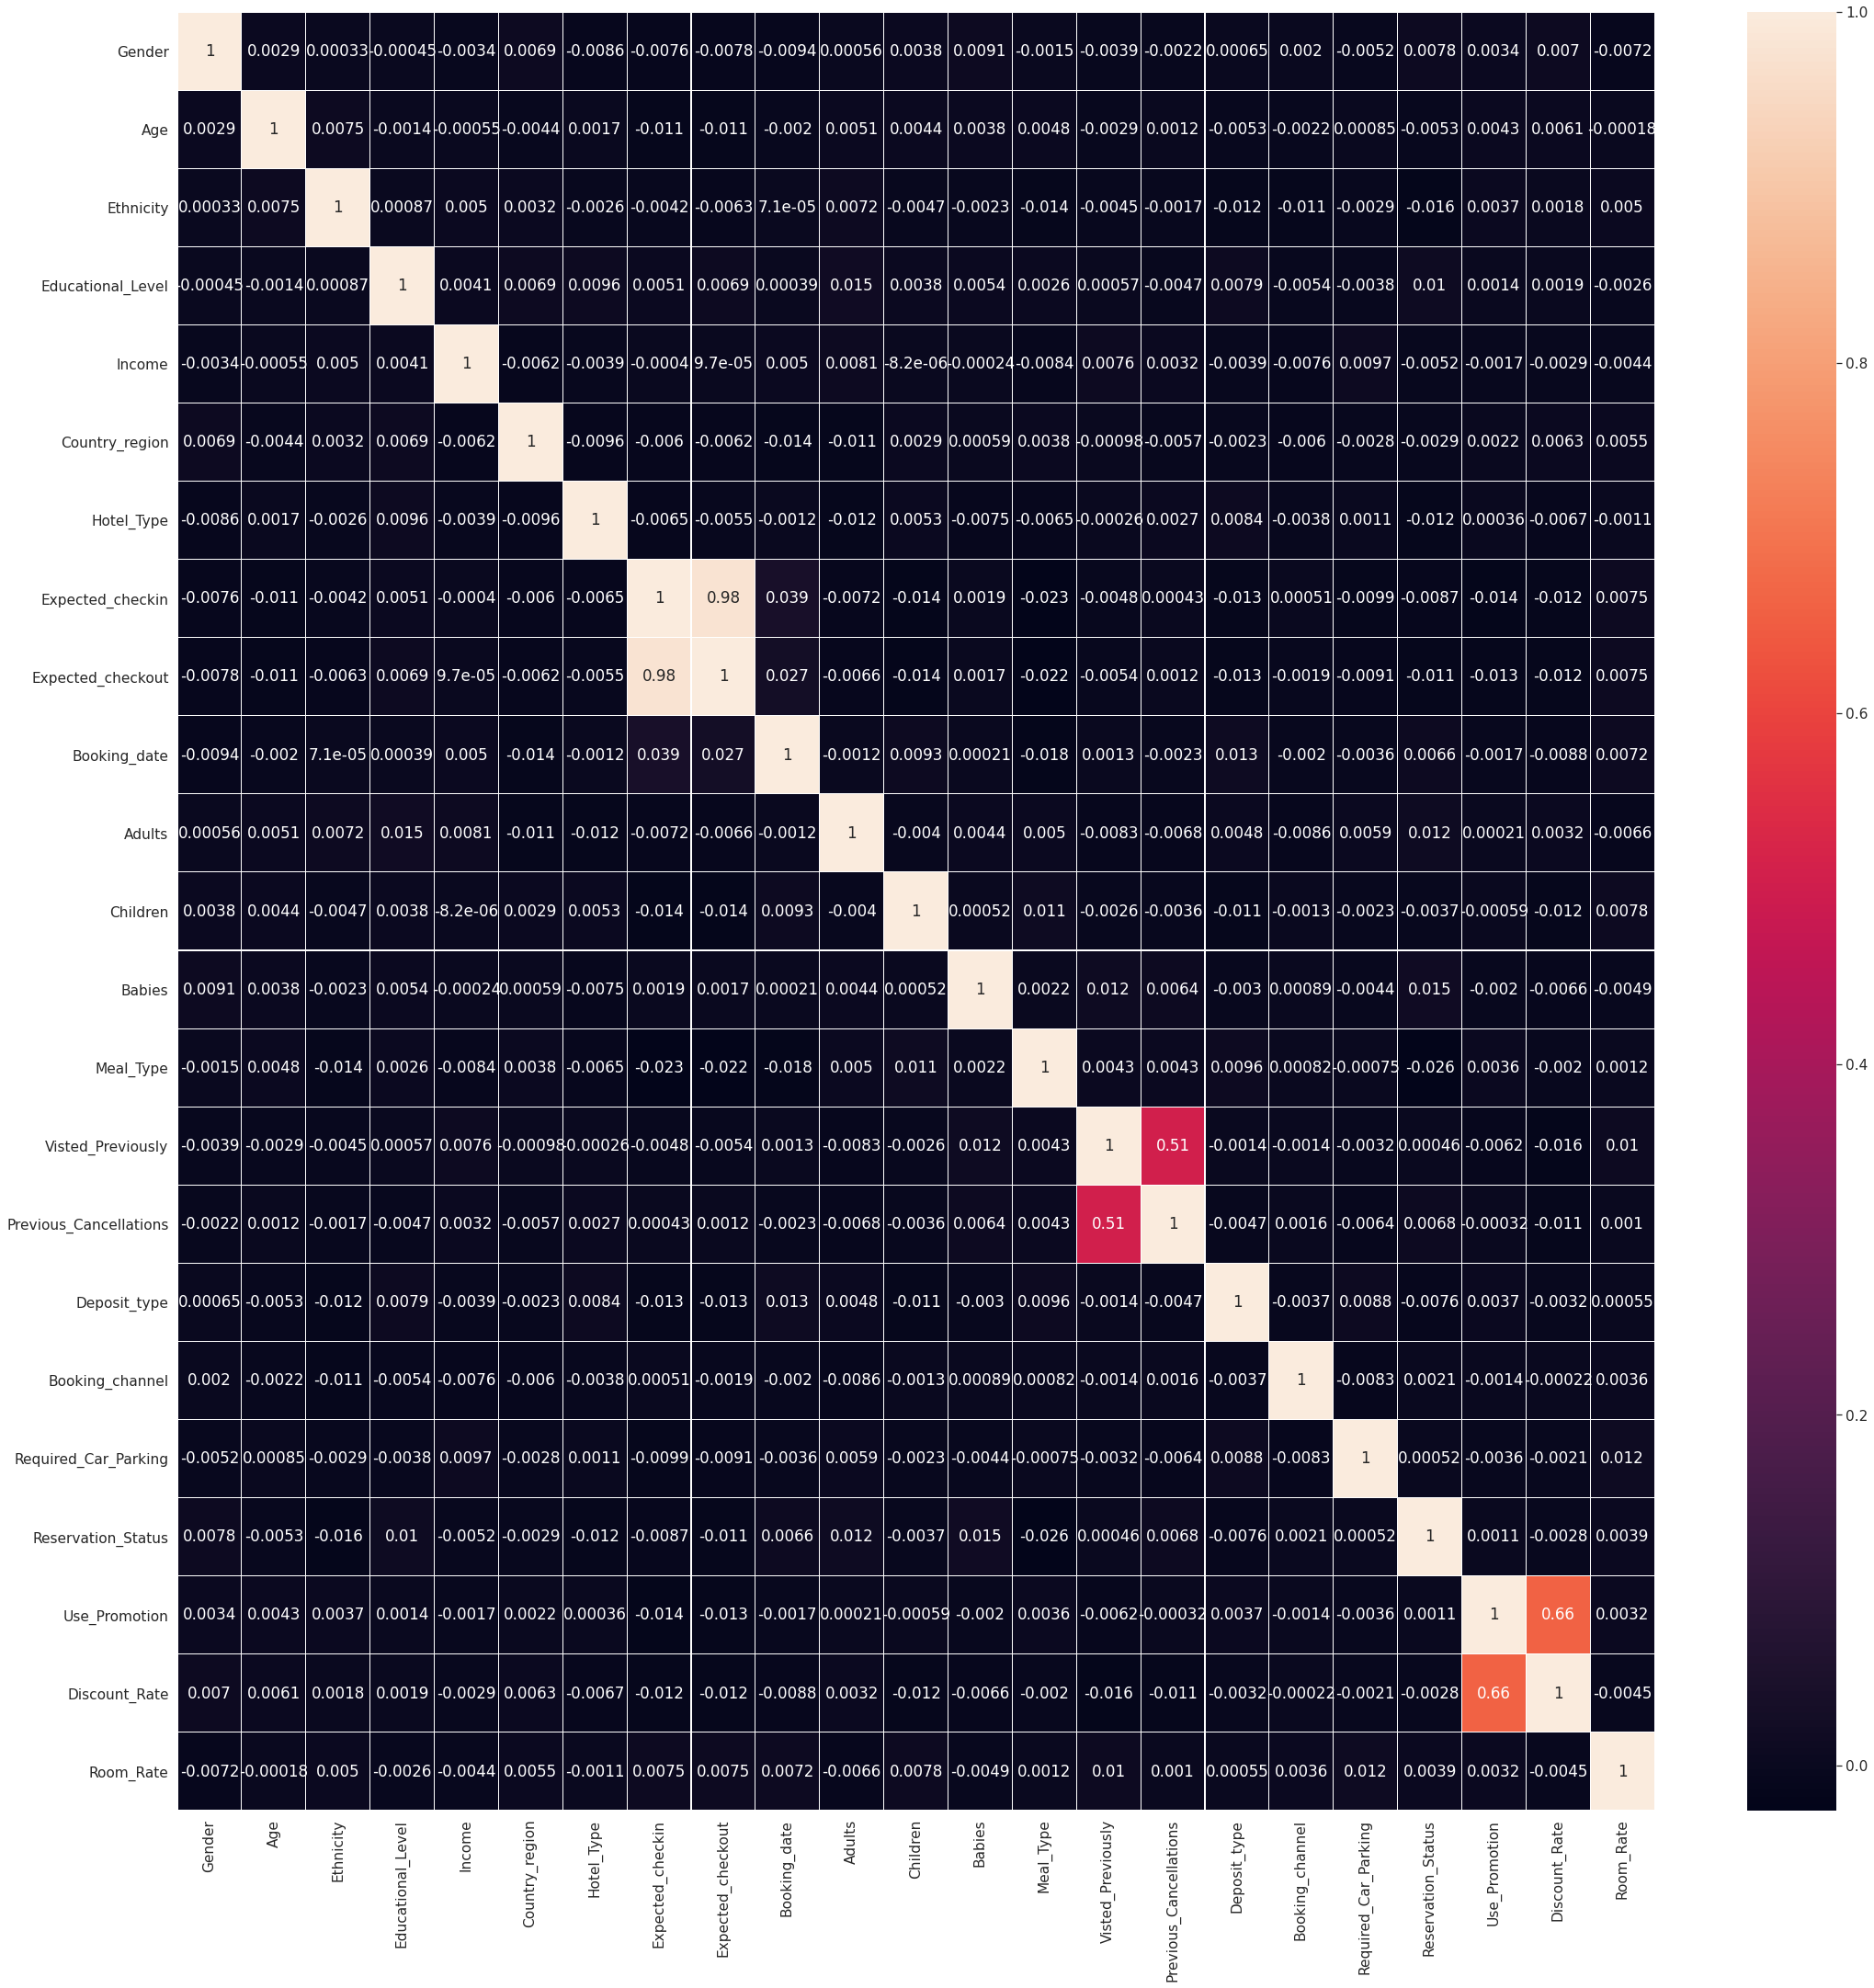

In [46]:
plt.figure(figsize=(36,36))
plt.rcParams["axes.labelsize"] = 20
sns.set(font_scale=1.4)
sns.heatmap(sample.corr(), annot = True ,linewidths=.1)
plt.show()